In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saira\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('BBC News Train.csv')

In [3]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [4]:
df['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

NUMBER OF SAMPLES IN EACH CATEGORY: 



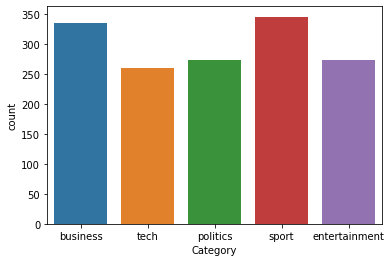

In [5]:
print('NUMBER OF SAMPLES IN EACH CATEGORY: \n')
sns.countplot(df.Category)

In [6]:
# DATA CLEANING
print('Data cleaning in progress...')

# Tokenize
df['text_clean'] = df['Text'].apply(nltk.word_tokenize)

# Remove stop words
stop_words=set(nltk.corpus.stopwords.words("english"))
df['text_clean'] = df['text_clean'].apply(lambda x: [item for item in x if item not in stop_words])

# Remove numbers, punctuation and special characters (only keep words)
regex = '[a-z]+'
df['text_clean'] = df['text_clean'].apply(lambda x: [item for item in x if re.match(regex, item)])

# Lemmatization
lem = nltk.stem.wordnet.WordNetLemmatizer()
df['text_clean'] = df['text_clean'].apply(lambda x: [lem.lemmatize(item, pos='v') for item in x])


Data cleaning in progress...


In [7]:
# Encode label categories to numbers
enc = LabelEncoder()
df['Category_Num'] = enc.fit_transform(df['Category'])
labels = list(enc.classes_)
df.head(5)

,ArticleId,Text,Category,text_clean,Category_Num
0,1833,worldcom ex-boss launches defence lawyers defe...,business,"[worldcom, ex-boss, launch, defence, lawyers, ...",0
1,154,german business confidence slides german busin...,business,"[german, business, confidence, slide, german, ...",0
2,1101,bbc poll indicates economic gloom citizens in ...,business,"[bbc, poll, indicate, economic, gloom, citizen...",0
3,1976,lifestyle governs mobile choice faster bett...,tech,"[lifestyle, govern, mobile, choice, faster, be...",4
4,917,enron bosses in $168m payout eighteen former e...,business,"[enron, boss, payout, eighteen, former, enron,...",0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Category_Num'], test_size=0.3, shuffle=True)
vec=TfidfVectorizer()
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)
model=MultinomialNB(alpha=0.5,fit_prior=False)
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

In [9]:

print("Precision: %1.3f \tRecall: %1.3f \t\tF1: %1.3f\n" % (precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro')))

Precision: 0.963 	Recall: 0.963 		F1: 0.962



In [10]:
accuracy_score(y_test,y_pred)

0.9642058165548099

## Adding Category to the BCC News Test.csv

In [18]:
test=pd.read_csv("BBC News Test.csv")
test11=test['Text']

In [12]:
#Vectorising
X_test_vec1 = vec.transform(test11)

In [13]:
ypred1 = model.predict(X_test_vec1)


In [14]:
category=[]
for y in ypred1:
    if(y==0):
        category.append("business")
    if(y==1):
        category.append("entertainment")
    if(y==2):
        category.append("politics")
    if(y==3):
        category.append("sport")
    if(y==4):
        category.append("tech")

In [15]:
test['Category']=category

In [16]:
test.head(10)

,ArticleId,Text,Category
0,1018,qpr keeper day heads for preston queens park r...,sport
1,1319,software watching while you work software that...,tech
2,1138,d arcy injury adds to ireland woe gordon d arc...,sport
3,459,india s reliance family feud heats up the ongo...,business
4,1020,boro suffer morrison injury blow middlesbrough...,sport
5,51,lewsey puzzle over disallowed try england s jo...,sport
6,2025,blair blasts tory spending plans tony blair ha...,politics
7,1479,former ni minister scott dies former northern ...,politics
8,27,career honour for actor dicaprio actor leonard...,entertainment
9,397,tsunami to hit sri lanka banks sri lanka s b...,business


## As you can see, The Text is Related to that Category

In [17]:
df.to_csv('Solution.csv')